In [1]:
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA , PCA

In [1]:
from sklearn.cross_validation import train_test_split

In [3]:
digits = load_digits()
print digits.keys()
print digits['DESCR']

['images', 'data', 'target_names', 'DESCR', 'target']
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This ge

### Preprocessing and Feature Selection

Not all pixels are useful in identifying the digit. Only few of the pixels has high correlation with the actual data.

In [4]:
features = digits['data']
labels = digits['target']

print features[:2]
print features.shape


[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]
(1797L, 64L)


In [5]:
features[10].reshape(8,8)

array([[  0.,   0.,   1.,   9.,  15.,  11.,   0.,   0.],
       [  0.,   0.,  11.,  16.,   8.,  14.,   6.,   0.],
       [  0.,   2.,  16.,  10.,   0.,   9.,   9.,   0.],
       [  0.,   1.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   4.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   1.,  16.,   5.,   1.,  11.,   3.,   0.],
       [  0.,   0.,  12.,  12.,  10.,  10.,   0.,   0.],
       [  0.,   0.,   1.,  10.,  13.,   3.,   0.,   0.]])

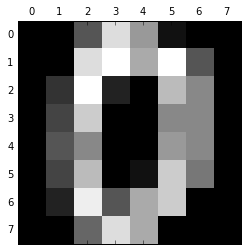

In [7]:
%matplotlib inline
plt.gray()
plt.matshow(features[0].reshape(8,8))

#### Reducing the number of features to the useful ones

Let us use the Principal component analysis and determine the first 30 pixels that has high correlation.

In [9]:
labels[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
pca = PCA(n_components=64)
pca.fit(features,labels)

PCA(copy=True, n_components=64, whiten=False)

array([ 0.14890594,  0.13618771,  0.11794594,  0.08409979,  0.05782415,
        0.0491691 ,  0.04315987,  0.03661373,  0.03353248,  0.03078806])

In [18]:
main_features = pca.transform(features)
main_features.shape

(1797L, 64L)

# Cross Validation

Let us split our dataset into training and test sets using the cross_validation module in SKLEARN

In [19]:
train_features,test_features,train_labels,test_labels = train_test_split(main_features,labels)

In [20]:
print train_features.shape
print test_features.shape
print train_labels.shape
print test_labels.shape

(1347L, 64L)
(450L, 64L)
(1347L,)
(450L,)


### Let us use a KNN classifier first

In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
knn.score(test_features,test_labels)

0.98666666666666669

### Using a Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
dt = DecisionTreeClassifier()
dt.fit(train_features,train_labels)
dt.score(test_features,test_labels)

0.8288888888888889

In [13]:
dt1 = RandomForestClassifier()
dt1.fit(train_features,train_labels)
dt1.score(test_features,test_labels)

0.92000000000000004

### Using a Support Vector machine

In [14]:
from sklearn.svm import LinearSVC

In [15]:
svc = LinearSVC()
svc.fit(train_features,train_labels)
svc.score(test_features,test_labels)

0.9555555555555556

In [16]:
#### Using ADA Boost search
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
ada = GradientBoostingClassifier()
ada.fit(train_features,train_labels)
ada.score(test_features,test_labels)

0.92666666666666664